# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [2]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[:500])

<class 'str'>
120253
﻿

***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************



*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE
IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK
(#1533) at https://www.gutenberg.org/ebooks/1533
*********************************


In [3]:
#CLEANING UP THE STORY print(macbeth[:16648]) - use this to figure out where story starts
#clean = macbeth[16648:].split()
macbeth_no_periods = macbeth[16648:].replace('.','')
macbeth_no_commas = macbeth_no_periods.replace(',','')
macbeth_no_qmarks = macbeth_no_commas.replace('?','')
macbeth_no_lp = macbeth_no_qmarks.replace('(','')
macbeth_no_rp = macbeth_no_lp.replace(')','')
clean = macbeth_no_rp.split()
clean

['The',
 'Tragedie',
 'of',
 'Macbeth',
 'Actus',
 'Primus',
 'Scoena',
 'Prima',
 'Thunder',
 'and',
 'Lightning',
 'Enter',
 'three',
 'Witches',
 '1',
 'When',
 'shall',
 'we',
 'three',
 'meet',
 'againe',
 'In',
 'Thunder',
 'Lightning',
 'or',
 'in',
 'Raine',
 '2',
 'When',
 'the',
 "Hurley-burley's",
 'done',
 'When',
 'the',
 "Battaile's",
 'lost',
 'and',
 'wonne',
 '3',
 'That',
 'will',
 'be',
 'ere',
 'the',
 'set',
 'of',
 'Sunne',
 '1',
 'Where',
 'the',
 'place',
 '2',
 'Vpon',
 'the',
 'Heath',
 '3',
 'There',
 'to',
 'meet',
 'with',
 'Macbeth',
 '1',
 'I',
 'come',
 'Gray-Malkin',
 'All',
 'Padock',
 'calls',
 'anon:',
 'faire',
 'is',
 'foule',
 'and',
 'foule',
 'is',
 'faire',
 'Houer',
 'through',
 'the',
 'fogge',
 'and',
 'filthie',
 'ayre',
 'Exeunt',
 'Scena',
 'Secunda',
 'Alarum',
 'within',
 'Enter',
 'King',
 'Malcome',
 'Donalbaine',
 'Lenox',
 'with',
 'attendants',
 'meeting',
 'a',
 'bleeding',
 'Captaine',
 'King',
 'What',
 'bloody',
 'man',
 'is',


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

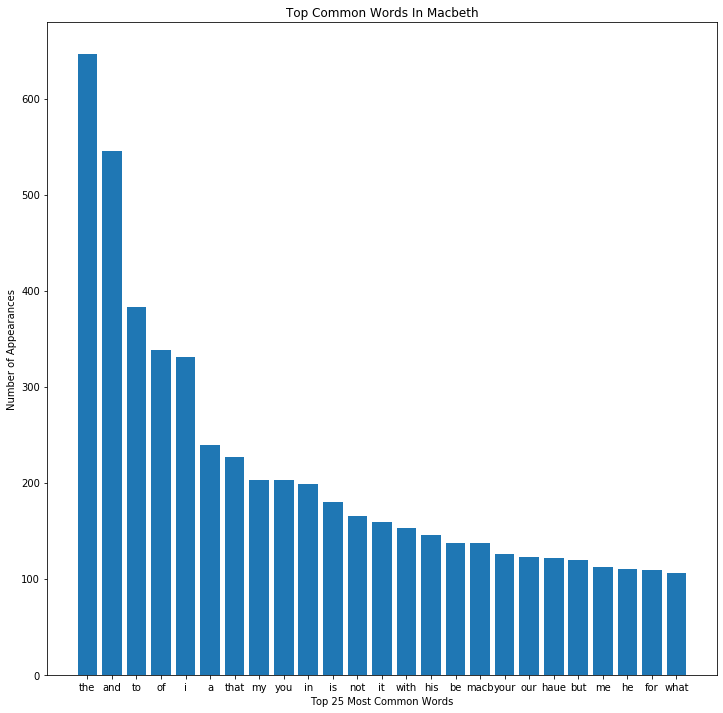

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here
macbeth_story = macbeth[16648:].lower()
punctuations = ['.',',','?','(',')',':',str(1),str(2),str(3)]
# Pseudo-code outline
for p in punctuations:
    macbeth_story = macbeth_story.replace(p,'')
    
# Split the transcript into words
clean = macbeth_story.split()
clean
# Create a dictionary
macbeth_dict = {}
# Iterate through the text of Macbeth
for i in clean:
    macbeth_dict[i] = 0
for i in clean:
    if macbeth_dict[i] != 0:
        macbeth_dict[i] += 1
    else:
        macbeth_dict[i] = 1
macbeth_dict
# Update word counts
# Sort words by counts in descending order
sorted_macbeth = {k: v for k, v in sorted(macbeth_dict.items(), key=lambda item: item[1], reverse=True)}
sorted_macbeth
# Create Bar Graph
x = []
y = []
import collections  #Method to get the top 25 most common words.
top25 = collections.Counter(sorted_macbeth).most_common(25)
for i in top25:
    x.append(i[0])
    y.append(i[1])
plt.figure(figsize=(12,12))
plt.bar(x,y)


# Include descriptive titles and labels
plt.xlabel('Top 25 Most Common Words')
plt.ylabel('Number of Appearances')
plt.title('Top Common Words In Macbeth')
plt.show()

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!